In [3]:
# First, let's import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker

In [4]:
file1 = pd.read_csv('P:/LAB/Manuel/2023/2023-03/Microscopy/20230329_Double staining_2/20230329_RED.csv')
file2 = pd.read_csv('P:/LAB/Manuel/2023/2023-03/Microscopy/20230330_Double staining_3/20230330_RED.csv')
file3 = pd.read_csv('P:/LAB/Manuel/2023/2023-03/Microscopy/20230331_Double staining_4/20230331_RED.csv')
data = pd.concat([file1, file2, file3])

In [7]:
print(file1.groupby('IMAGE').size())
print(file2.groupby('IMAGE').size())
print(file3.groupby('IMAGE').size())

IMAGE
EM14439_RED_120    330
EM14439_RED_180    376
EM14439_RED_60     275
EM14440_RED_120    345
EM14440_RED_180    330
EM14440_RED_60     307
dtype: int64
IMAGE
EM14439_RED_120    421
EM14439_RED_180    412
EM14439_RED_60     351
EM14440_RED_120    352
EM14440_RED_180    287
EM14440_RED_60     366
dtype: int64
IMAGE
EM14439_RED_120    533
EM14439_RED_180    614
EM14439_RED_60     319
EM14440_RED_120    418
EM14440_RED_180    253
EM14440_RED_60     297
dtype: int64


In [15]:
mean_intensity1 = data['INTENSITY.ch1.mean'].mean()
mean_intensity2 = data['INTENSITY.ch2.mean'].mean()
print(f'Mean intensity1: {mean_intensity1}, Mean intensity2: {mean_intensity2}')

Mean intensity1: 241.21881816732466, Mean intensity2: 255.32379389067722


In [16]:
mean_intensity1_per_strain = data.groupby('IMAGE')['INTENSITY.ch1.mean'].mean()
mean_intensity2_per_strain = data.groupby('IMAGE')['INTENSITY.ch2.mean'].mean()
print(f'Mean intensity1 per strain: {mean_intensity1_per_strain}')
print(f'Mean intensity2 per strain: {mean_intensity2_per_strain}')

Mean intensity1 per strain: IMAGE
EM14439_RED_120    115.863045
EM14439_RED_180    111.542187
EM14439_RED_60     136.157867
EM14440_RED_120    231.151461
EM14440_RED_180    888.955095
EM14440_RED_60     127.549324
Name: INTENSITY.ch1.mean, dtype: float64
Mean intensity2 per strain: IMAGE
EM14439_RED_120    122.384885
EM14439_RED_180    122.450339
EM14439_RED_60     132.032293
EM14440_RED_120    276.839010
EM14440_RED_180    899.653559
EM14440_RED_60     140.825083
Name: INTENSITY.ch2.mean, dtype: float64


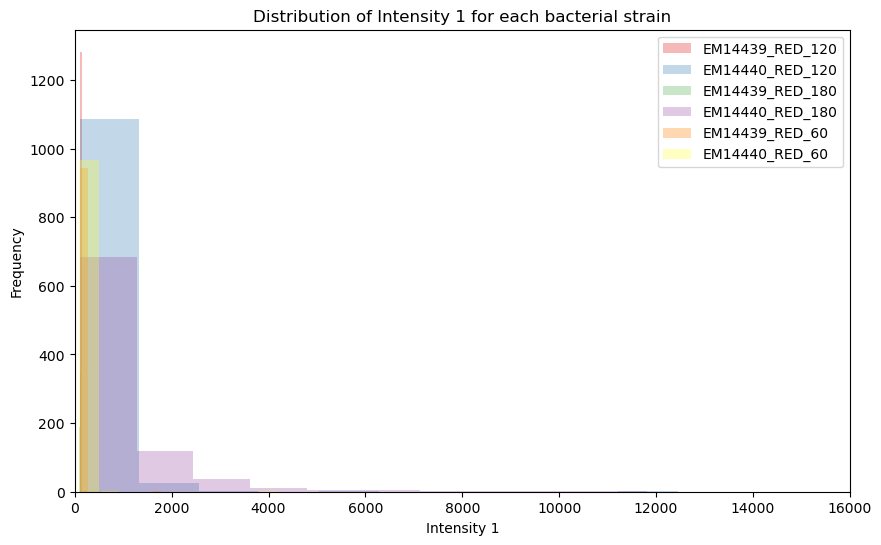

In [17]:
# Plotting the distribution of INTENSITY1 for each bacterial strain
sns.set_palette("Set1") 

plt.figure(figsize=(10, 6))
for strain in data['IMAGE'].unique():
    plt.hist(data[data['IMAGE']==strain]['INTENSITY.ch1.mean'], label=strain, alpha=0.3)
plt.xlabel('Intensity 1')
plt.ylabel('Frequency')
plt.title('Distribution of Intensity 1 for each bacterial strain')
plt.xlim(0,16000)
plt.legend()
plt.show()

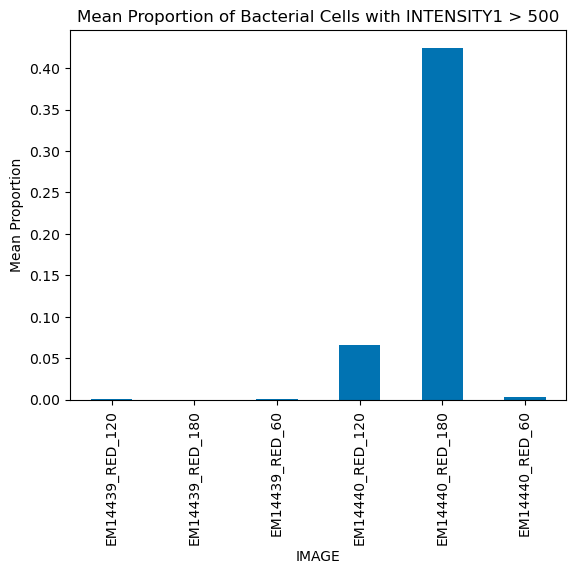

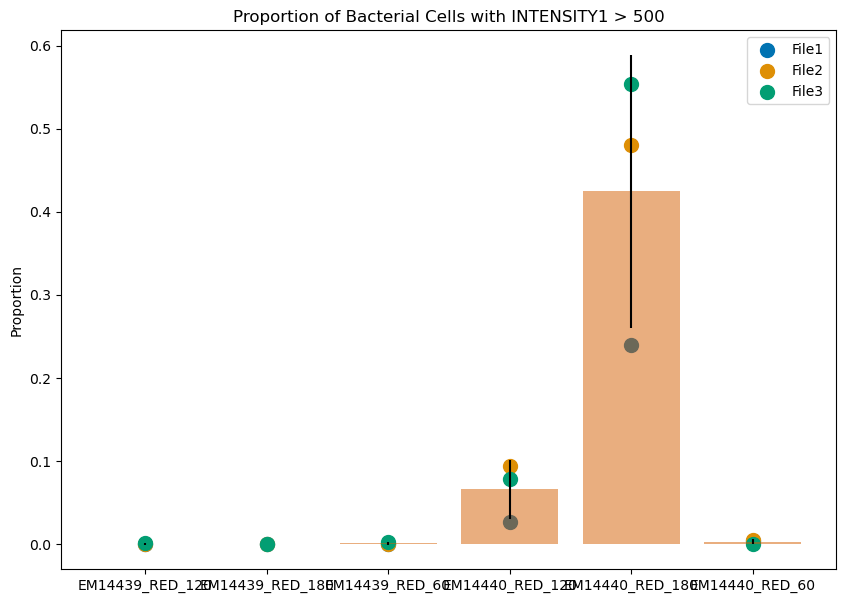

In [18]:
# Define colorblind palette
sns.set_palette('colorblind')

# Concatenate files
data = pd.concat([file1, file2, file3], keys=['File1', 'File2', 'File3']).reset_index().rename(columns={"level_0": "File"})

# Calculate the proportion of bacterial cell for each file where INTENSITY1 > 500
data['Above500'] = data['INTENSITY.ch1.mean'] > 500
proportion = data.groupby(['File', 'IMAGE'])['Above500'].mean().unstack()
mean_proportion = proportion.mean()

# Plot mean proportion as a bar plot
mean_proportion.plot(kind='bar')
plt.ylabel('Mean Proportion')
plt.title('Mean Proportion of Bacterial Cells with INTENSITY1 > 500')
plt.show()

# Calculate standard deviation of proportions
std_proportion = proportion.std()

# Plot individual proportions and overlay mean and standard deviation
plt.figure(figsize=(10, 7))
for file in proportion.index:
    plt.scatter(proportion.columns, proportion.loc[file], s=100, label=file)
plt.bar(mean_proportion.index, mean_proportion, yerr=std_proportion, alpha=0.5)
plt.ylabel('Proportion')
plt.title('Proportion of Bacterial Cells with INTENSITY1 > 500')
plt.legend()
plt.show()

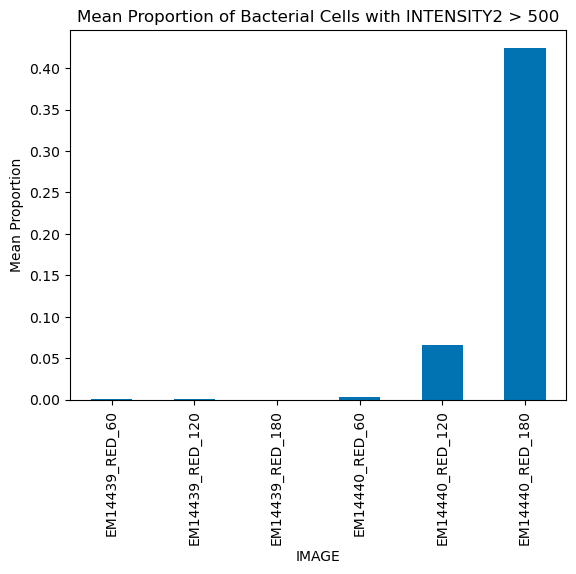

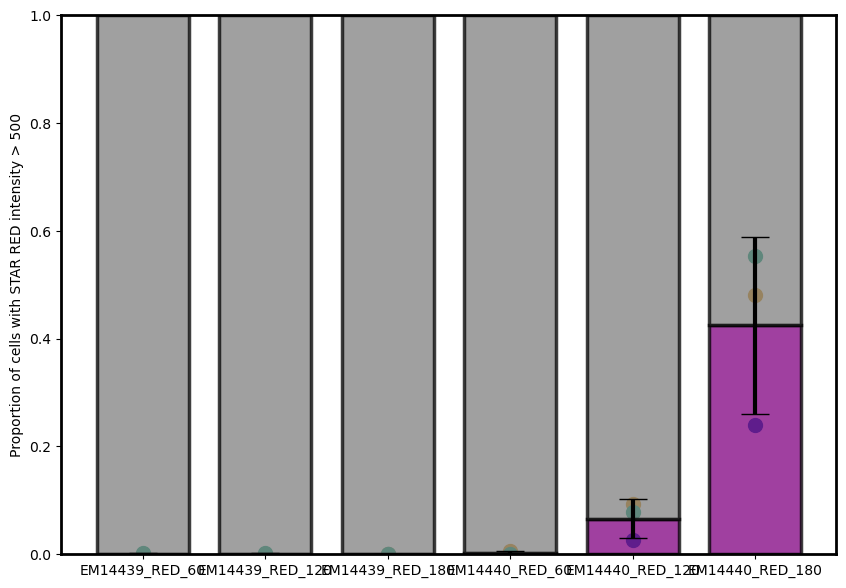

In [20]:
sns.set_palette('colorblind')

# Concatenate files
data = pd.concat([file1, file2, file3], keys=['File1', 'File2', 'File3']).reset_index().rename(columns={"level_0": "File"})

# Calculate the proportion of bacterial cell for each file where INTENSITY1 > 500
data['Above500'] = data['INTENSITY.ch1.mean'] > 500
proportion = data.groupby(['File', 'IMAGE'])['Above500'].mean().unstack()
mean_proportion = proportion.mean()

# Specify the order of the strains
order = ['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180', 'EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']  # Adjust as necessary

# Plot mean proportion as a bar plot with the specified order
mean_proportion.loc[order].plot(kind='bar')
plt.ylabel('Mean Proportion')
plt.title('Mean Proportion of Bacterial Cells with INTENSITY2 > 500')
plt.show()

# Calculate standard deviation of proportions
std_proportion = proportion.std()

# Plot individual proportions and overlay mean and standard deviation with the specified order and color
plt.figure(figsize=(10, 7))
for file in proportion.index:
    plt.scatter(order, proportion.loc[file, order], s=100, label=file)
plt.bar(order, mean_proportion.loc[order], yerr=std_proportion.loc[order], color=['#800080'], 
        alpha=0.75, error_kw={'elinewidth': 3, 'capsize': 10}, width=0.75, edgecolor='black', linewidth=2.5)
plt.bar(order, 1-mean_proportion.loc[order], bottom=mean_proportion.loc[order], 
        color='gray', alpha=0.75, edgecolor='black', linewidth=2.5, width=0.75)

plt.ylim([0, 1])  # Set limits of y-axis
plt.ylabel('Proportion of cells with STAR RED intensity > 500')


# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the width as needed

plt.title('')
#plt.legend()
#plt.savefig('Maleimide.tiff',dpi=300)
plt.show()

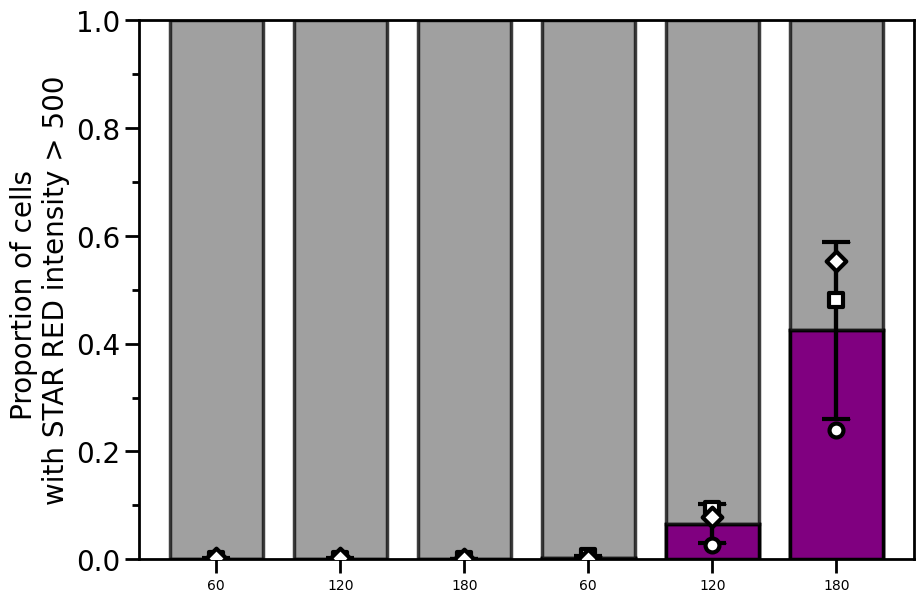

In [71]:
# Define a list of marker styles
marker_styles = ['o', 's', 'D']

# Define a list of colors (this is an example, feel free to choose your own)
#custom_colors = sns.color_palette('husl', len(marker_styles))

# [Assuming file1, file2, and file3 are defined earlier in your code]
# Concatenate files
data = pd.concat([file1, file2, file3], keys=['File1', 'File2', 'File3']).reset_index().rename(columns={"level_0": "File"})

# Calculate the proportion of bacterial cell for each file where INTENSITY1 > 500
data['Above500'] = data['INTENSITY.ch1.mean'] > 500
proportion = data.groupby(['File', 'IMAGE'])['Above500'].mean().unstack()
mean_proportion = proportion.mean()

# Specify the order of the strains
order = ['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180', 'EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']
# Custom names for the x-ticks
custom_names = ['60', '120', '180', '60', '120', '180']

# Plot mean proportion as a bar plot with the specified order
fig, ax = plt.subplots(figsize=(10, 7))
#mean_proportion.loc[order].plot(kind='bar', ax=ax)
mean_proportion.loc[order].plot(kind='bar', ax=ax, color=['#800080'], 
                                alpha=0.75, edgecolor='black', linewidth=2.5, width=0.75)
ax.set_title('')

# Calculate standard deviation of proportions
std_proportion = proportion.std()

# Plot individual proportions and overlay mean and standard deviation
ax.bar(order, mean_proportion.loc[order], yerr=std_proportion.loc[order], color=['#800080'], 
       alpha=0.75, error_kw={'elinewidth': 3, 'capsize': 10}, width=0.75, edgecolor='black', linewidth=2.5)
ax.bar(order, mean_proportion.loc[order], yerr=std_proportion.loc[order], color=['#800080'], 
       alpha=1, error_kw={'elinewidth': 3, 'capsize': 10, 'capthick': 3}, width=0.75, edgecolor='black', linewidth=2.5)
plt.bar(order, 1-mean_proportion.loc[order], bottom=mean_proportion.loc[order], 
        color='gray', alpha=0.75, edgecolor='black', linewidth=2.5, width=0.75)
#for file in proportion.index:
 #   ax.scatter(order, proportion.loc[file, order], s=100, label=file)
    
# Plot the individual points with custom markers and colors
for i, (file, m, c) in enumerate(zip(proportion.index, marker_styles, custom_colors)):
    ax.scatter(order, proportion.loc[file, order], s=100, 
               label=file, marker=m, color='white', edgecolor='black', linewidths=3, zorder=3)    
#alternative colour orange ? #FF8C00     
ax.set_ylim([0, 1])  # Set limits of y-axis
ax.set_ylabel('Proportion of cells \nwith STAR RED intensity > 500', size=20)
ax.set_xlabel('')
# Set minor locator and adjust ticks for y-axis
ax.yaxis.set_minor_locator(mticker.MultipleLocator(0.1))
ax.tick_params(axis='y', which='minor', length=5, width=2)  # Adjust width and length of minor ticks
ax.tick_params(axis='y', which='major', length=10, width=2)  # Adjust width and length of major ticks
ax.tick_params(axis='x', which='major', length=10, width=2)  # Adjust width and length of major ticks
ax.set_xticklabels(custom_names, rotation=0, ha='center')
ax.tick_params(axis='y', labelsize=20)  # Adjust the font size as needed
# Increase the width of the axes and frame
for spine in ax.spines.values():
    spine.set_linewidth(2)
    
plt.savefig('AboveValue_Maleimide.tiff',dpi=300, bbox_inches='tight')
plt.show()

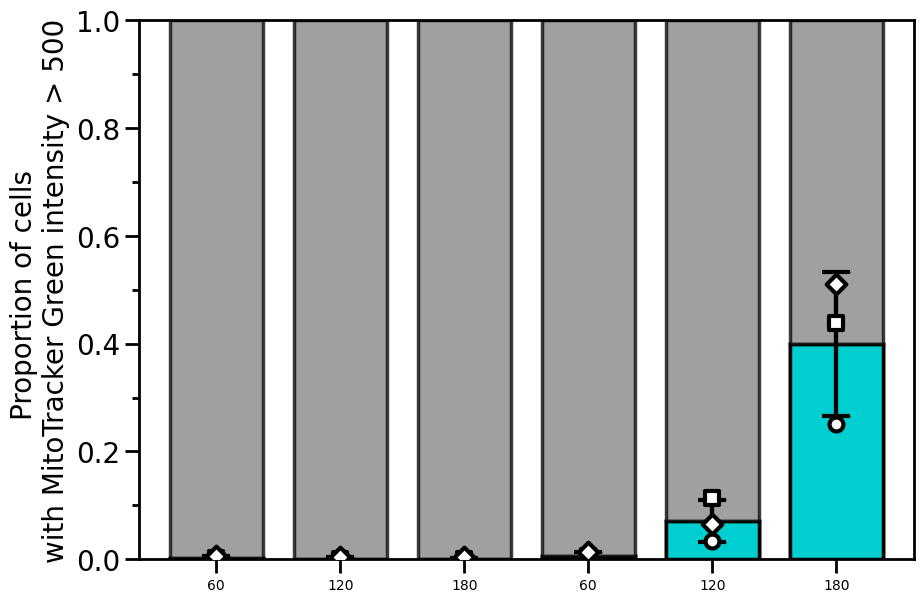

In [72]:
# Define a list of marker styles
marker_styles = ['o', 's', 'D']

# Define a list of colors (this is an example, feel free to choose your own)
#custom_colors = sns.color_palette('husl', len(marker_styles))

# [Assuming file1, file2, and file3 are defined earlier in your code]
# Concatenate files
data = pd.concat([file1, file2, file3], keys=['File1', 'File2', 'File3']).reset_index().rename(columns={"level_0": "File"})

# Calculate the proportion of bacterial cell for each file where INTENSITY1 > 500
data['Above500'] = data['INTENSITY.ch2.mean'] > 500
proportion = data.groupby(['File', 'IMAGE'])['Above500'].mean().unstack()
mean_proportion = proportion.mean()

# Specify the order of the strains
order = ['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180', 'EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']
# Custom names for the x-ticks
custom_names = ['60', '120', '180', '60', '120', '180']

# Plot mean proportion as a bar plot with the specified order
fig, ax = plt.subplots(figsize=(10, 7))
#mean_proportion.loc[order].plot(kind='bar', ax=ax)
mean_proportion.loc[order].plot(kind='bar', ax=ax, color=['#800080'], 
                                alpha=0.75, edgecolor='black', linewidth=2.5, width=0.75)
ax.set_title('')

# Calculate standard deviation of proportions
std_proportion = proportion.std()

# Plot individual proportions and overlay mean and standard deviation
ax.bar(order, mean_proportion.loc[order], yerr=std_proportion.loc[order], color=['#00ced1'], 
       alpha=0.75, error_kw={'elinewidth': 3, 'capsize': 10}, width=0.75, edgecolor='black', linewidth=2.5)
ax.bar(order, mean_proportion.loc[order], yerr=std_proportion.loc[order], color=['#00ced1'], 
       alpha=1, error_kw={'elinewidth': 3, 'capsize': 10, 'capthick': 3}, width=0.75, edgecolor='black', linewidth=2.5)
plt.bar(order, 1-mean_proportion.loc[order], bottom=mean_proportion.loc[order], 
        color='gray', alpha=0.75, edgecolor='black', linewidth=2.5, width=0.75)
#for file in proportion.index:
 #   ax.scatter(order, proportion.loc[file, order], s=100, label=file)
    
# Plot the individual points with custom markers and colors
for i, (file, m, c) in enumerate(zip(proportion.index, marker_styles, custom_colors)):
    ax.scatter(order, proportion.loc[file, order], s=100, 
               label=file, marker=m, color='white', edgecolor='black', linewidths=3, zorder=3)    
#alternative colour orange ? #FF8C00     
ax.set_ylim([0, 1])  # Set limits of y-axis
ax.set_ylabel('Proportion of cells \nwith MitoTracker Green intensity > 500', size=20)
ax.set_xlabel('')
# Set minor locator and adjust ticks for y-axis
ax.yaxis.set_minor_locator(mticker.MultipleLocator(0.1))
ax.tick_params(axis='y', which='minor', length=5, width=2)  # Adjust width and length of minor ticks
ax.tick_params(axis='y', which='major', length=10, width=2)  # Adjust width and length of major ticks
ax.tick_params(axis='x', which='major', length=10, width=2)  # Adjust width and length of major ticks
ax.set_xticklabels(custom_names, rotation=0, ha='center')
ax.tick_params(axis='y', labelsize=20)  # Adjust the font size as needed
# Increase the width of the axes and frame
for spine in ax.spines.values():
    spine.set_linewidth(2)
    
plt.savefig('AboveValue_MitoTracker.tiff',dpi=300, bbox_inches='tight')
plt.show()

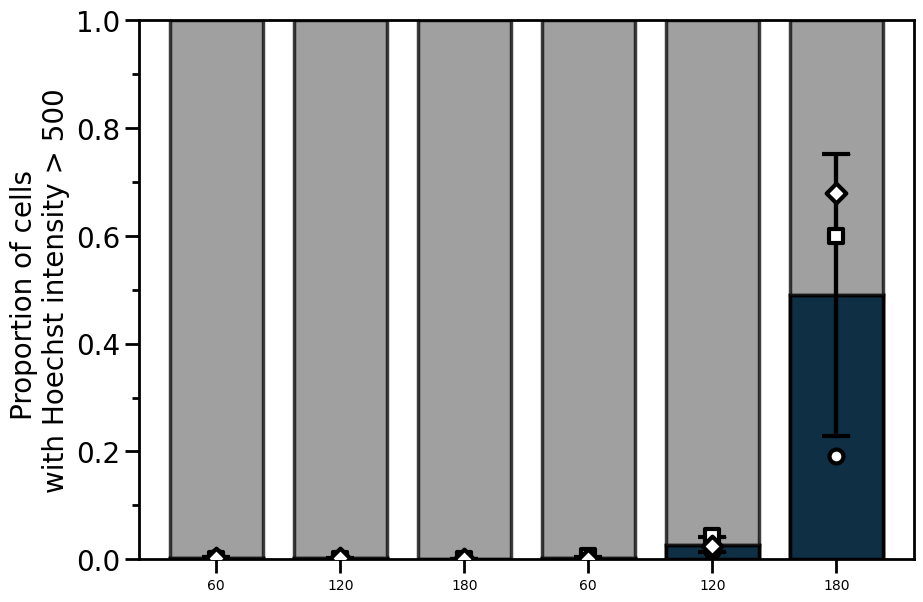

In [73]:
# Define a list of marker styles
marker_styles = ['o', 's', 'D']

# Define a list of colors (this is an example, feel free to choose your own)
#custom_colors = sns.color_palette('husl', len(marker_styles))

# [Assuming file1, file2, and file3 are defined earlier in your code]
# Concatenate files
data = pd.concat([file1, file2, file3], keys=['File1', 'File2', 'File3']).reset_index().rename(columns={"level_0": "File"})

# Calculate the proportion of bacterial cell for each file where INTENSITY1 > 500
data['Above500'] = data['INTENSITY.ch3.mean'] > 500
proportion = data.groupby(['File', 'IMAGE'])['Above500'].mean().unstack()
mean_proportion = proportion.mean()

# Specify the order of the strains
order = ['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180', 'EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']
# Custom names for the x-ticks
custom_names = ['60', '120', '180', '60', '120', '180']

# Plot mean proportion as a bar plot with the specified order
fig, ax = plt.subplots(figsize=(10, 7))
#mean_proportion.loc[order].plot(kind='bar', ax=ax)
mean_proportion.loc[order].plot(kind='bar', ax=ax, color=['#800080'], 
                                alpha=0.75, edgecolor='black', linewidth=2.5, width=0.75)
ax.set_title('')

# Calculate standard deviation of proportions
std_proportion = proportion.std()

# Plot individual proportions and overlay mean and standard deviation
ax.bar(order, mean_proportion.loc[order], yerr=std_proportion.loc[order], color=['#0e2f44'], 
       alpha=0.75, error_kw={'elinewidth': 3, 'capsize': 10}, width=0.75, edgecolor='black', linewidth=2.5)
ax.bar(order, mean_proportion.loc[order], yerr=std_proportion.loc[order], color=['#0e2f44'], 
       alpha=1, error_kw={'elinewidth': 3, 'capsize': 10, 'capthick': 3}, width=0.75, edgecolor='black', linewidth=2.5)
plt.bar(order, 1-mean_proportion.loc[order], bottom=mean_proportion.loc[order], 
        color='gray', alpha=0.75, edgecolor='black', linewidth=2.5, width=0.75)
#for file in proportion.index:
 #   ax.scatter(order, proportion.loc[file, order], s=100, label=file)
    
# Plot the individual points with custom markers and colors
for i, (file, m, c) in enumerate(zip(proportion.index, marker_styles, custom_colors)):
    ax.scatter(order, proportion.loc[file, order], s=100, 
               label=file, marker=m, color='white', edgecolor='black', linewidths=3, zorder=3)    
#alternative colour orange ? #FF8C00     
ax.set_ylim([0, 1])  # Set limits of y-axis
ax.set_ylabel('Proportion of cells \nwith Hoechst intensity > 500', size=20)
ax.set_xlabel('')
# Set minor locator and adjust ticks for y-axis
ax.yaxis.set_minor_locator(mticker.MultipleLocator(0.1))
ax.tick_params(axis='y', which='minor', length=5, width=2)  # Adjust width and length of minor ticks
ax.tick_params(axis='y', which='major', length=10, width=2)  # Adjust width and length of major ticks
ax.tick_params(axis='x', which='major', length=10, width=2)  # Adjust width and length of major ticks
ax.set_xticklabels(custom_names, rotation=0, ha='center')
ax.tick_params(axis='y', labelsize=20)  # Adjust the font size as needed
# Increase the width of the axes and frame
for spine in ax.spines.values():
    spine.set_linewidth(2)
    
plt.savefig('AboveValue_DAPI.tiff',dpi=300, bbox_inches='tight')
plt.show()